<a href="https://colab.research.google.com/github/Maria-Costa/Arduino-Fisica/blob/main/Arduino_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd  # para ler o excel e mexer com tabelas
import numpy as np   # para fazer cálculos como média, ajuste linear e tudo mais
import matplotlib.pyplot as plt  # para gerar gráficos

In [6]:
#import da planilha do excel que foi utilizada durante as aulas para trabalhar com os dados do Tracker e gerar os gráficos
from google.colab import files
uploaded = files.upload()

Saving Arduino3 (1).xlsx to Arduino3 (1) (1).xlsx


In [7]:
# ler a planilha chamada "Planilha1", ignorando as 2 primeiras linhas
df = pd.read_excel("Arduino3 (1).xlsx", sheet_name="Planilha1", skiprows=2)

# para renomear as colunas para os nomes que eu quero
df.columns = ['index', 'tempo', 'posicao', 'velocidade', 'aceleracao', 'acel_modelo', 'forca']
df = df.drop(columns=['index'])

# converter os dados para números
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# remover linhas em que o tempo ou velocidade estão vazios
df = df.dropna(subset=['tempo', 'velocidade'])

In [8]:
#DEFINIÇÃO DOS TRECHOS

# trecho 1: aceleração mais forte
t1 = df[(df['tempo'] >= 0.0000) & (df['tempo'] <= 0.7659)]

# trecho 2: aceleração leve
t2 = df[(df['tempo'] >= 0.7992) & (df['tempo'] <= 6.4261)]

# trecho 3: velocidade constante (aceleração fica perto de zero)
t3 = df[(df['tempo'] >= 6.4594) & (df['tempo'] <= 10.0223)]

# trecho 4: desaceleração
t4 = df[(df['tempo'] >= 10.0556) & (df['tempo'] <= 10.4218)]

In [9]:
# para calcular aceleração média: a = Δv / Δt
def aceleracao_media(trecho):
    if trecho.empty:
        return None
    v0 = trecho['velocidade'].iloc[0]
    vf = trecho['velocidade'].iloc[-1]
    t0 = trecho['tempo'].iloc[0]
    tf = trecho['tempo'].iloc[-1]
    return round((vf - v0) / (tf - t0), 4)

# aplicando essa função em cada trecho
a_medias = {
    "Trecho 1": aceleracao_media(t1),
    "Trecho 2": aceleracao_media(t2),
    "Trecho 3": aceleracao_media(t3),
    "Trecho 4": aceleracao_media(t4)
}

# para mostrar os valores encontrados
a_medias


{'Trecho 1': np.float64(0.2732),
 'Trecho 2': np.float64(0.0333),
 'Trecho 3': np.float64(0.0052),
 'Trecho 4': np.float64(-1.0269)}

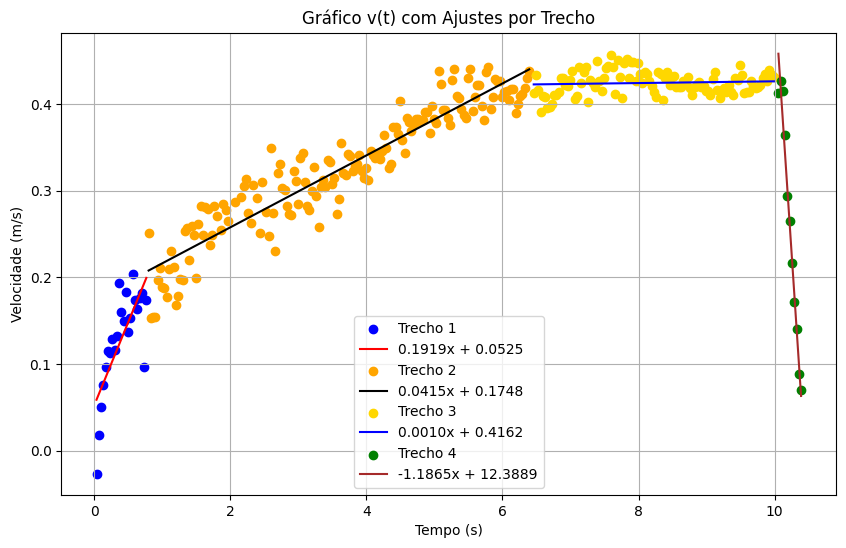

In [10]:
# função para ajustar reta em cada trecho: v = a*t + b
def ajustar_reta(tempo, velocidade):
    coef = np.polyfit(tempo, velocidade, 1)
    return coef, np.poly1d(coef)

# ajustando cada trecho com polyfit (é uma função utilizada pra ajustar os dados dentro de uma função polinomial)
coef1, f1 = ajustar_reta(t1['tempo'], t1['velocidade'])
coef2, f2 = ajustar_reta(t2['tempo'], t2['velocidade'])
coef3, f3 = ajustar_reta(t3['tempo'], t3['velocidade'])
coef4, f4 = ajustar_reta(t4['tempo'], t4['velocidade'])

# gráfico de velocidade com a divisão de cores e equações
plt.figure(figsize=(10, 6))

plt.scatter(t1['tempo'], t1['velocidade'], color='blue', label='Trecho 1')
plt.plot(t1['tempo'], f1(t1['tempo']), color='red', label=f'{coef1[0]:.4f}x + {coef1[1]:.4f}')

plt.scatter(t2['tempo'], t2['velocidade'], color='orange', label='Trecho 2')
plt.plot(t2['tempo'], f2(t2['tempo']), color='black', label=f'{coef2[0]:.4f}x + {coef2[1]:.4f}')

plt.scatter(t3['tempo'], t3['velocidade'], color='gold', label='Trecho 3')
plt.plot(t3['tempo'], f3(t3['tempo']), color='blue', label=f'{coef3[0]:.4f}x + {coef3[1]:.4f}')

plt.scatter(t4['tempo'], t4['velocidade'], color='green', label='Trecho 4')
plt.plot(t4['tempo'], f4(t4['tempo']), color='brown', label=f'{coef4[0]:.4f}x + {coef4[1]:.4f}')

plt.title('Gráfico v(t) com Ajustes por Trecho')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.legend()
plt.show()

Nesse caso do gráfico gerado acima, é possível observar que as linhas de tendência estão com um 'gap' entre elas, mas existem formas de resolver isso.

1. Podemos forçar que uma reta “comece onde a anterior terminou”, ajustando os pontos de forma manual ;)

2. Mas uma forma mais simples e fiel seria gerar um conjunto contínuo de tempos e concatenar as retas ajustadas com os mesmos limites :))

Essa segunda solução envolve o uso do `np.linspace()`, que vai criar uma lista de pontos entre dois valores (como se fosse um tempo de início até o fim).

A ideia seria gerar manualmente os intervalos de tempo de cada reta, garantir que o fim de um intervalo seja o início do próximo e usar esses tempos para desenhar as retas com `f(t)`

Essa alternativa é mais fiel pelo fato de que não estamos mudando a equação em si, estamos apenas melhorando a **visualização**. O gráfico continua fiel aos dados, só que de forma mais bonita e ajustada visualmente para facilitar o entendimento dos movimentos/estudo.


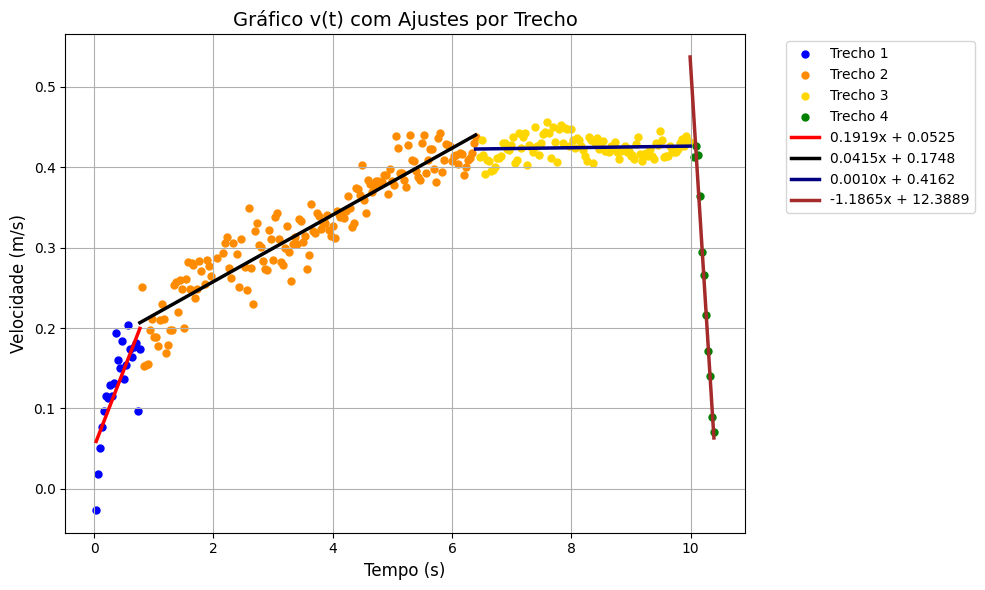

In [16]:
# função para ajustar reta em cada trecho: v = a*t + b
def ajustar_reta(tempo, velocidade):
    coef = np.polyfit(tempo, velocidade, 1)
    return coef, np.poly1d(coef)

# ajustando cada trecho com polyfit
coef1, f1 = ajustar_reta(t1['tempo'], t1['velocidade'])
coef2, f2 = ajustar_reta(t2['tempo'], t2['velocidade'])
coef3, f3 = ajustar_reta(t3['tempo'], t3['velocidade'])
coef4, f4 = ajustar_reta(t4['tempo'], t4['velocidade'])

# Criar intervalos contínuos de tempo para encostar as retas
t1_range = np.linspace(t1['tempo'].iloc[0], t1['tempo'].iloc[-1], 50)
t2_range = np.linspace(t1['tempo'].iloc[-1], t2['tempo'].iloc[-1], 50)
t3_range = np.linspace(t2['tempo'].iloc[-1], t3['tempo'].iloc[-1], 50)
t4_range = np.linspace(t3['tempo'].iloc[-1], t4['tempo'].iloc[-1], 50)

# gráfico de velocidade com melhorias visuais
plt.figure(figsize=(10, 6))

# pontos experimentais
plt.scatter(t1['tempo'], t1['velocidade'], color='blue', label='Trecho 1', s=25)
plt.scatter(t2['tempo'], t2['velocidade'], color='darkorange', label='Trecho 2', s=25)
plt.scatter(t3['tempo'], t3['velocidade'], color='gold', label='Trecho 3', s=25)
plt.scatter(t4['tempo'], t4['velocidade'], color='green', label='Trecho 4', s=25)

# retas ajustadas
plt.plot(t1_range, f1(t1_range), color='red', linewidth=2.5, label=f'{coef1[0]:.4f}x + {coef1[1]:.4f}')
plt.plot(t2_range, f2(t2_range), color='black', linewidth=2.5, label=f'{coef2[0]:.4f}x + {coef2[1]:.4f}')
plt.plot(t3_range, f3(t3_range), color='navy', linewidth=2.5, label=f'{coef3[0]:.4f}x + {coef3[1]:.4f}')
plt.plot(t4_range, f4(t4_range), color='brown', linewidth=2.5, label=f'{coef4[0]:.4f}x + {coef4[1]:.4f}')

# ajustes de layout
plt.title('Gráfico v(t) com Ajustes por Trecho', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade (m/s)', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()
plt.show()

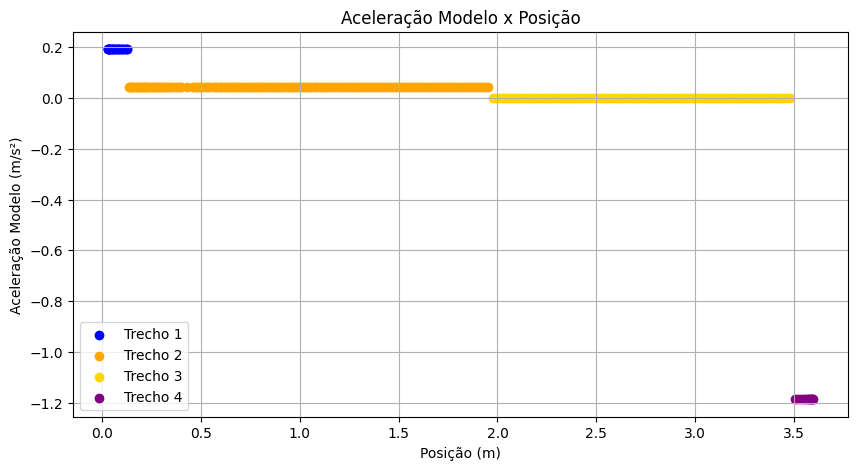

In [17]:
# gráfico da aceleração modelo por posição
plt.figure(figsize=(10, 5))

plt.scatter(t1['posicao'], t1['acel_modelo'], color='blue', label='Trecho 1')
plt.scatter(t2['posicao'], t2['acel_modelo'], color='orange', label='Trecho 2')
plt.scatter(t3['posicao'], t3['acel_modelo'], color='gold', label='Trecho 3')
plt.scatter(t4['posicao'], t4['acel_modelo'], color='purple', label='Trecho 4')

plt.title('Aceleração Modelo x Posição')
plt.xlabel('Posição (m)')
plt.ylabel('Aceleração Modelo (m/s²)')
plt.grid(True)
plt.legend()
plt.show()